1. Flag dates of interest automatically
2. Determine direction

Important dates X
Sentinment Analysis X
Topical Word Flag X
Country Flag X
Country extraction
Currency Flag X

# **Setup**

In [30]:
import pandas as pd
import numpy as np
from google.colab import drive
import nltk
from nltk import word_tokenize
from nltk import WordNetLemmatizer
import matplotlib.pylab as plt

In [31]:
# mount your Google Drive
drive.mount("/content/gdrive") 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
path=F'/content/gdrive/My Drive/Data606/Data/Foreign_Exchange_Rates.csv'
df=pd.read_csv(path)

In [33]:
df=df.drop('Unnamed: 0', axis=1)
df=df.replace(to_replace='ND', value=np.NaN)
df=df.set_index('Time Serie')
df = df.apply(pd.to_numeric)
df.head(1000)

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,9.4015,6.126,1.6563,7.3290,101.70,3.8,7.9640,8.4430,72.30,1.5808,31.38,36.97
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,9.4570,6.085,1.6535,7.2180,103.09,3.8,7.9340,8.3600,72.65,1.5565,30.60,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,9.5350,6.070,1.6560,7.2080,103.77,3.8,7.9350,8.3530,72.95,1.5526,30.80,37.10
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,9.5670,6.080,1.6655,7.2125,105.19,3.8,7.9400,8.3675,72.95,1.5540,31.75,37.62
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,9.5200,6.057,1.6625,7.2285,105.17,3.8,7.9660,8.4150,73.15,1.5623,30.85,37.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-10-27,1.4209,0.8502,1.6402,0.5899,2.8710,1.3107,8.2767,7.7541,45.40,1183.0,11.1195,6.880,1.7430,6.3230,108.38,3.8,7.0230,7.7250,94.45,1.3159,33.95,39.99
2003-10-28,1.4182,0.8555,1.6340,0.5898,2.8625,1.3108,8.2766,7.7578,45.31,1186.0,11.0670,6.950,1.7455,6.3594,108.33,3.8,7.0364,7.7478,94.62,1.3287,33.95,39.98
2003-10-29,1.4190,0.8567,1.6329,0.5887,2.8540,1.3098,8.2766,7.7595,45.36,1179.0,11.1500,6.920,1.7362,6.3670,108.18,3.8,7.0534,7.7181,94.62,1.3293,33.95,39.95


# **Find Important Dates**

In [34]:
from datetime import datetime, timedelta

In [35]:
pf=df.pct_change(periods=10)

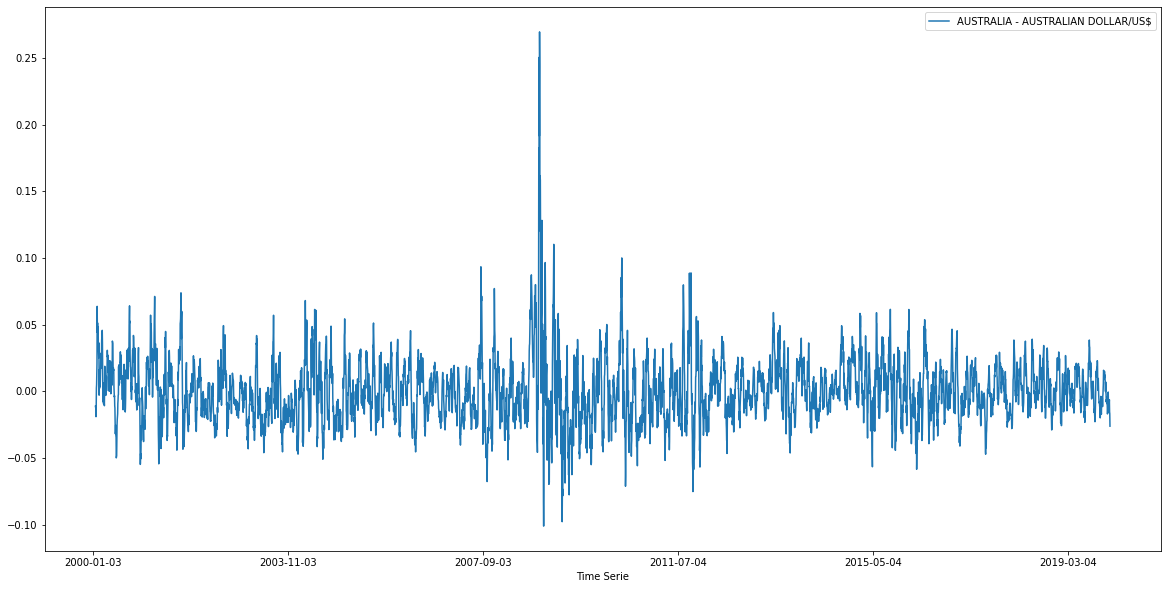

In [36]:
pf['AUSTRALIA - AUSTRALIAN DOLLAR/US$'].plot(legend=True,figsize=(20,10))

In [37]:
def fill_days(data,days):
  new_days=[]
  for x in data:
    for y in range(1,days):
      d = x-timedelta(days=days)
      new_days.append(d)
  new_days=pd.Series(new_days)
  return pd.to_datetime(pd.Series(data.append(new_days).unique()))




In [38]:
Aust_dates=pf[pf['AUSTRALIA - AUSTRALIAN DOLLAR/US$'].abs()>=.05].index.values
Aust_dates=pd.to_datetime(pd.Series(Aust_dates), infer_datetime_format=True)
Aust_dates=fill_days(Aust_dates,5)

EU_dates=pf[pf['EURO AREA - EURO/US$'].abs()>=.05].index.values
EU_dates=pd.to_datetime(pd.Series(EU_dates), infer_datetime_format=True)
EU_dates=fill_days(EU_dates,5)

NZ_dates=pf[pf['NEW ZEALAND - NEW ZELAND DOLLAR/US$'].abs()>=.05].index.values
NZ_dates=pd.to_datetime(pd.Series(NZ_dates), infer_datetime_format=True)
NZ_dates=fill_days(NZ_dates,5)

UK_dates=pf[pf['UNITED KINGDOM - UNITED KINGDOM POUND/US$'].abs()>=.05].index.values
UK_dates=pd.to_datetime(pd.Series(UK_dates), infer_datetime_format=True)
UK_dates=fill_days(UK_dates,5)

CA_dates=pf[pf['CANADA - CANADIAN DOLLAR/US$'].abs()>=.05].index.values
CA_dates=pd.to_datetime(pd.Series(CA_dates), infer_datetime_format=True)
CA_dates=fill_days(CA_dates,5)

CH_dates=pf[pf['CHINA - YUAN/US$'].abs()>=.05].index.values
CH_dates=pd.to_datetime(pd.Series(CH_dates), infer_datetime_format=True)
CH_dates=fill_days(CH_dates,5)

HK_dates=pf[pf['HONG KONG - HONG KONG DOLLAR/US$'].abs()>=.05].index.values
HK_dates=pd.to_datetime(pd.Series(HK_dates), infer_datetime_format=True)
HK_dates=fill_days(HK_dates,5)

JA_dates=pf[pf['JAPAN - YEN/US$'].abs()>=.05].index.values
JA_dates=pd.to_datetime(pd.Series(JA_dates), infer_datetime_format=True)
JA_dates=fill_days(JA_dates,5)

IN_dates=pf[pf['INDIA - INDIAN RUPEE/US$'].abs()>=.05].index.values
IN_dates=pd.to_datetime(pd.Series(IN_dates), infer_datetime_format=True)
IN_dates=fill_days(IN_dates,5)

SWI_dates=pf[pf['SWITZERLAND - FRANC/US$'].abs()>=.05].index.values
SWI_dates=pd.to_datetime(pd.Series(SWI_dates), infer_datetime_format=True)
SWI_dates=fill_days(SWI_dates,5)

SWE_dates=pf[pf['SWEDEN - KRONA/US$'].abs()>=.05].index.values
SWE_dates=pd.to_datetime(pd.Series(SWE_dates), infer_datetime_format=True)
SWE_dates=fill_days(SWE_dates,5)

SI_dates=pf[pf['SINGAPORE - SINGAPORE DOLLAR/US$'].abs()>=.05].index.values
SI_dates=pd.to_datetime(pd.Series(SI_dates), infer_datetime_format=True)
SI_dates=fill_days(SI_dates,5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


In [39]:
UK_dates

0     2000-05-11
1     2000-09-29
2     2003-07-17
3     2003-07-18
4     2008-08-13
         ...    
136   2018-01-20
137   2018-04-26
138   2019-10-16
139   2019-10-17
140   2019-10-18
Length: 141, dtype: datetime64[ns]

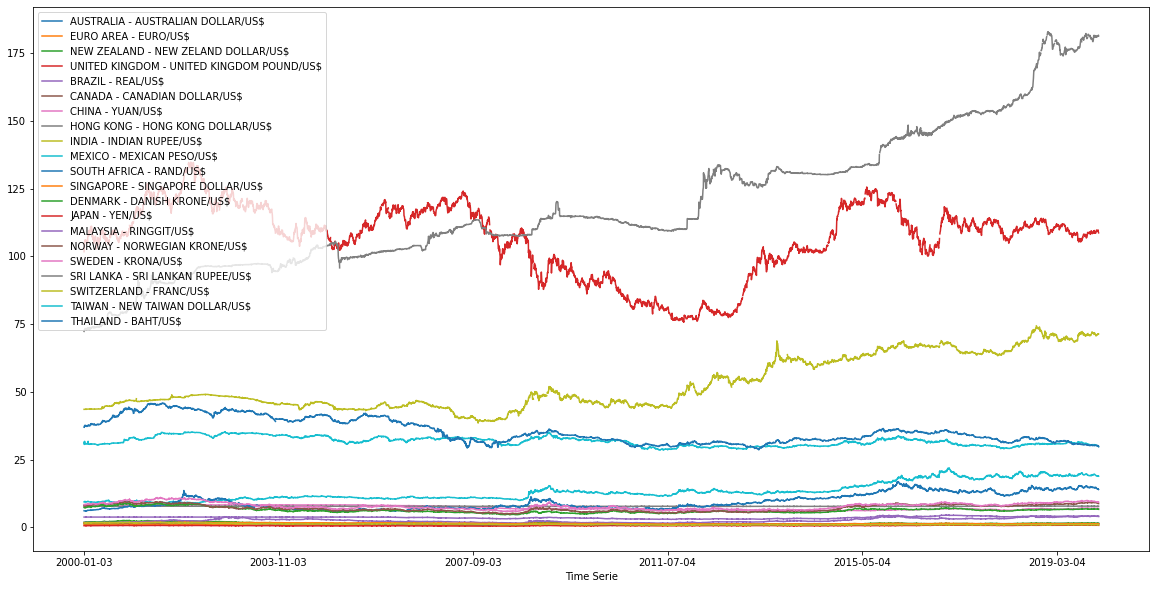

In [40]:
#df.plot(x='Time Serie')
df.drop('KOREA - WON/US$',axis=1).plot(legend=True,figsize=(20,10))

In [41]:
path=F'/content/gdrive/My Drive/Data606/Data/abcnews-date-text.csv'
df1=pd.read_csv(path)

In [42]:
df1['publish_date']=pd.to_datetime(df1['publish_date'],format='%Y%m%d')

In [43]:
UK=df1[df1['publish_date'].isin(UK_dates.values)]

In [44]:
AU=df1[df1['publish_date'].isin(Aust_dates.values)]

In [73]:
EU=df1[df1['publish_date'].isin(EU_dates.values)]

In [46]:
NZ=df1[df1['publish_date'].isin(NZ_dates.values)]

In [47]:
SWI=df1[df1['publish_date'].isin(SWI_dates.values)]

In [48]:
CA=df1[df1['publish_date'].isin(CA_dates.values)]

In [49]:
JA=df1[df1['publish_date'].isin(JA_dates.values)]

In [50]:
IN=df1[df1['publish_date'].isin(IN_dates.values)]

In [51]:
CH=df1[df1['publish_date'].isin(CH_dates.values)]

In [52]:
def combine_keep(l1,l2,keep):
  #assume list are same length
  l3=[]
  x=len(l1)
  i=0
  while i<x:
    if l1[i]==keep or l2[i]==keep:
      l3.append(keep)
    else:
      l3.append(False)
    i+=1
  return l3

In [53]:
dates=combine_keep(df1['publish_date'].isin(UK_dates.values).values,df1['publish_date'].isin(Aust_dates.values).values,True)
dates=combine_keep(dates,df1['publish_date'].isin(EU_dates.values).values,True)
dates=combine_keep(dates,df1['publish_date'].isin(NZ_dates.values).values,True)
dates=combine_keep(dates,df1['publish_date'].isin(SWI_dates.values).values,True)
dates=combine_keep(dates,df1['publish_date'].isin(CA_dates.values).values,True)
dates=combine_keep(dates,df1['publish_date'].isin(JA_dates.values).values,True)
dates=combine_keep(dates,df1['publish_date'].isin(IN_dates.values).values,True)
dates=combine_keep(dates,df1['publish_date'].isin(CH_dates.values).values,True)

KeyboardInterrupt: ignored

# **Text Analysis**

In [54]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
from wordcloud import WordCloud, ImageColorGenerator

# Define a function to create a wordcloud from dictionary of word frequency
def wordcloud_from_frequency(word_freq_dict, title, figure_size=(10, 6)):
    wordcloud.generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    
# Define a function to plot top10 positive words and top10 negative words in a grouped bar plot (from dictionaries)
def topn_wordfreq_bar_both(pos_word_freq_dict, neg_word_freq_dict, pos_num_doc, neg_num_doc, topn, title, palette, height=6, aspect=2):
    # Transform positive word frequency into DF
    df_pos = pd.DataFrame.from_dict(pos_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_pos.columns = ["frequency"]
    df_pos["frequency"] = df_pos["frequency"] / pos_num_doc
    df_pos["label"] = "Positive"
    # Transform negative word frequency into DF
    df_neg = pd.DataFrame.from_dict(neg_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_neg.columns = ["frequency"]
    df_neg["frequency"] = df_neg["frequency"] / neg_num_doc
    df_neg["label"] = "Negative"
    # Append two dataframes
    df_append = df_pos.append(df_neg)
    df_append.reset_index(inplace=True)
    # Plot
    sns.catplot(x="index", y="frequency", hue="label", data=df_append, 
                kind="bar",
                palette=palette,
                height=height, aspect=aspect, 
                legend_out=False)
    plt.title(title)
    plt.show()


def word_freq_dict(text):
    # Convert text into word list
    wordList = text.split()
    # Generate word freq dictionary
    wordFreqDict = {word: wordList.count(word) for word in wordList}
    return wordFreqDict


In [56]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

def clean_text(text):
    # Split into list
    wordList = text.split()
    # Remove stopwords
    wordList = [word for word in wordList if word not in stop]
    return " ".join(wordList)

In [ ]:
import collections

all_pos = " ".join(UK['headline_text'][0:1000])
all_pos=clean_text(all_pos)
word_freq = word_freq_dict(all_pos)
word_freq=collections.OrderedDict(sorted(word_freq.items(), key=lambda t: t[1],reverse=True))
lists = take(50,word_freq.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.title('UK Word Frequencies')
#plt.plot(x, y)
#plt.show()
plt.bar(x,y,color='orange')

In [ ]:
all_pos = " ".join(EU['headline_text'][0:1000])
all_pos=clean_text(all_pos)
word_freq = word_freq_dict(all_pos)
word_freq=collections.OrderedDict(sorted(word_freq.items(), key=lambda t: t[1],reverse=True))
lists = take(50,word_freq.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.title('EU Word Frequencies')
#plt.plot(x, y)
#plt.show()
plt.bar(x,y,color='orange')

In [ ]:
all_pos = " ".join(AU['headline_text'][0:1000])
all_pos=clean_text(all_pos)
word_freq = word_freq_dict(all_pos)
word_freq=collections.OrderedDict(sorted(word_freq.items(), key=lambda t: t[1],reverse=True))
lists = take(50,word_freq.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.plot(x, y)
plt.show()

In [ ]:
all_pos = " ".join(JA['headline_text'][0:1000])
all_pos=clean_text(all_pos)
word_freq = word_freq_dict(all_pos)
word_freq=collections.OrderedDict(sorted(word_freq.items(), key=lambda t: t[1],reverse=True))
lists = take(50,word_freq.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.plot(x, y)
plt.show()

In [ ]:
all_pos = " ".join(CA['headline_text'][0:1000])
all_pos=clean_text(all_pos)
word_freq = word_freq_dict(all_pos)
word_freq=collections.OrderedDict(sorted(word_freq.items(), key=lambda t: t[1],reverse=True))
lists = take(50,word_freq.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.plot(x, y)
plt.show()

In [59]:
def f(row):
    if row['EURO AREA - EURO/US$'] <0:
        val = 'Buy'
    elif row['EURO AREA - EURO/US$'] >0:
        val = 'Sell'
    else:
        val = 'Hold'
    return val

In [75]:
pf['Direction'] = pf.apply(f, axis=1)
pf['Date']=pd.to_datetime(pf.index)
EU=pd.merge(EU,pf[['Date','Direction']], how='inner',left_on='publish_date',right_on='Date')

In [78]:
EU[EU['Direction']=='Buy'].head(10)

,publish_date,headline_text,Date,Direction
6691,2008-12-10,12 abc learning centres in wa to close,2008-12-10,Buy
6692,2008-12-10,14yo charged over school vandalism attack,2008-12-10,Buy
6693,2008-12-10,16 charged over derby riot,2008-12-10,Buy
6694,2008-12-10,19pc of reef lost 35pc threatened study,2008-12-10,Buy
6695,2008-12-10,4 charged over mt warrigal bashing,2008-12-10,Buy
6696,2008-12-10,55 abc learning centres to close,2008-12-10,Buy
6697,2008-12-10,abalone surveys begin,2008-12-10,Buy
6698,2008-12-10,abare predicts bigger wa winter harvest,2008-12-10,Buy
6699,2008-12-10,abc learning closures revealed vic fares worst,2008-12-10,Buy
6700,2008-12-10,abc learning receiver announces 55 centres to ...,2008-12-10,Buy


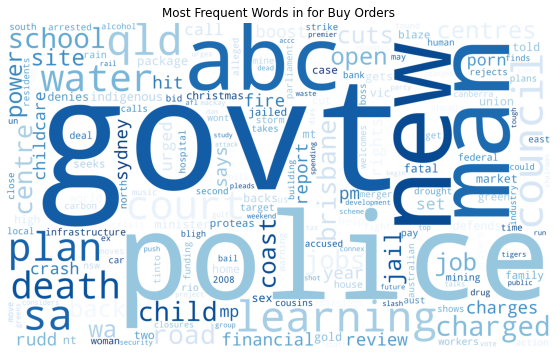

In [79]:
all_pos = " ".join(EU[EU["Direction"]=='Buy']['headline_text'][0:1000])
all_pos=clean_text(all_pos)
all_pos_word_freq = word_freq_dict(all_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="white")
wordcloud_from_frequency(all_pos_word_freq, "Most Frequent Words in for Buy Orders")

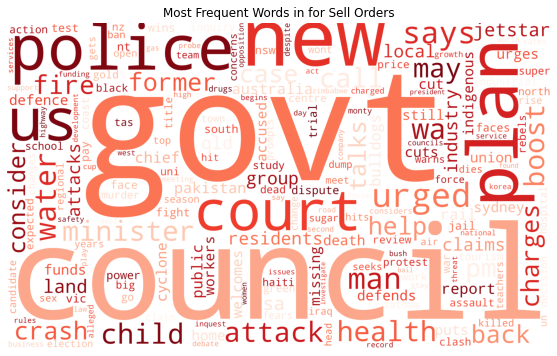

In [81]:
all_pos = " ".join(EU[EU["Direction"]=='Sell']['headline_text'][0:1000])
all_pos=clean_text(all_pos)
all_pos_word_freq = word_freq_dict(all_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Reds",
                      background_color="white")
wordcloud_from_frequency(all_pos_word_freq, "Most Frequent Words in for Sell Orders")

# **Sentiment Analysis**

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
analyzer = SentimentIntensityAnalyzer()

In [ ]:
start_time = time.time()
df1["headline_text"] = df1["headline_text"].astype("str")
df1["sent_neg"] = df1["headline_text"].apply(lambda x: analyzer.polarity_scores(x)["neg"])
df1["sent_nue"] = df1["headline_text"].apply(lambda x: analyzer.polarity_scores(x)["neu"])
df1["sent_pos"] = df1["headline_text"].apply(lambda x: analyzer.polarity_scores(x)["pos"])
df1["sent_comp"] = df1["headline_text"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
print("It takes %s seconds for the code to finish." % (time.time() - start_time))

In [ ]:
df1.to_csv('/content/gdrive/My Drive/Data606/Data/Headlines_Sentiment.csv')

# **Word Flagging**

In [ ]:
#Add country flags(Aust,UK,EU...)
#Add topical word flags(police, government, war...)
#Add Economic word flags(currency, banking, stock market...)

In [ ]:
path=F'/content/gdrive/My Drive/Data606/Data/Headlines_Sentiment.csv'
df1=pd.read_csv(path)

In [ ]:
countries=[' uk ','united kingdom','japan','china',' eu ','swiss','switzerland','canada','aust','aussie',' nz ','new zealand','india']
topical=['police',' war ','govt','crash','buy','sell','bond',' us ','court','central bank','debt','market','interest','inflation','easing','saving']
currency=['pound','gpb','dollar','yuan','yen','rupee','franc ','krona']

In [ ]:
Country_Flag = [df1['headline_text'].str.contains(x).values for x in countries]
Topical_Flag = [df1['headline_text'].str.contains(x).values for x in topical]
Currency_Flag = [df1['headline_text'].str.contains(x).values for x in currency]
#Country_Flag[0]

In [ ]:

i=0
while i <= len(Country_Flag)-2:
  if i==0:
    comb=combine_keep(Country_Flag[i],Country_Flag[i+1],True)
    i+=1
  elif i>0:
    comb=combine_keep(comb,Country_Flag[i+1],True)
    i+=1
df1['Country_Flag']= comb

i=0
while i <= len(Topical_Flag)-2:
  if i==0:
    comb=combine_keep(Topical_Flag[i],Topical_Flag[i+1],True)
    i+=1
  elif i>0:
    comb=combine_keep(comb,Topical_Flag[i+1],True)
    i+=1

df1['Topical_Flag'] = comb

i=0
while i <= len(Currency_Flag)-2:
  if i==0:
    comb=combine_keep(Currency_Flag[i],Currency_Flag[i+1],True)
    i+=1
  elif i>0:
    comb=combine_keep(comb,Currency_Flag[i+1],True)
    i+=1

df1['Currency_Flag'] = comb

In [ ]:
df1[df1['Currency_Flag']==True].head(10)

# **Final Dataframe**

In [ ]:
df1['Date_Flag']=dates
#df1.to_csv('/content/gdrive/My Drive/Data606/Data/Headlines_Flagged.csv')

In [ ]:
df=pd.read_csv('/content/gdrive/My Drive/Data606/Data/Headlines_Flagged.csv')
df=df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
print(df['publish_date'].max())
print(df['publish_date'].min())

In [ ]:
train=df[df['publish_date']<='2015-12-31']
test=df[df['publish_date']>'2015-12-31']

# **1st Model**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [ ]:
from mlxtend.feature_selection import ColumnSelector

In [ ]:
def flatten(l):
  flat_list = []
  for sublist in l:
      for item in sublist:
          flat_list.append(item)
  return flat_list

def Dict_Converter(df):
    df.to_dict('list')
    return df

class ItemSelector(BaseEstimator, TransformerMixin):   
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self,data_dict):
        return data_dict[self.key]

#Pipeline
pipeline = Pipeline([
    # Use FeatureUnion to combine the features from subject and body
    ('union', FeatureUnion(
        transformer_list=[
                        
                ('title', Pipeline([
                ('selector', ItemSelector(key='headline_text')),
                ('tfidf', TfidfVectorizer(min_df=50)),
                ])),    

                ('PCA',PCA(n_components=2)),
                ('univ_select',SelectKBest(k=1))
              ],

        # weight components in FeatureUnion
        transformer_weights={
            'title': 1,
            'PCA': .5,
            'univ_select':.5
        },
    )),

    # Use a SVC classifier on the combined features
    ('svc', SVC(kernel='linear')),
])


In [ ]:
df['publish_date']=df['publish_date'].astype('int64')//1e9
train=df[df.index.values<=750000]
test=df[df.index.values>750000]

In [ ]:
pipeline.fit(train.drop('Date_Flag',axis=1), train['Date_Flag'])
y = pipeline.predict(test.drop('Date_Flag',axis=1))
print(classification_report(y, test['Date_Flag']))

In [ ]:
#Linear SVC
#t0=time.time()
SGDC=SGDClassifier(loss='hinge',max_iter=100)
SGDC.fit(train_body_vect,train['rating'])
#(accuracy_score(SGDC.predict(vectors_testc),testc['class']))
(print(classification_report(SGDC.predict(test_body_vect),test['rating'])))
#t1=time.time()
#total = t1-t0
#print(total)

In [ ]:
#t0=time.time()
#cleaned
abc = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=40)
abc.fit(train['sent_comp'].to_numpy().reshape(-1,1),train['rating'])
#(accuracy_score(abc.predict(vectors_testc),testc['class']))
#print(confusion_matrix(bc.predict(test_df.drop('target',axis=1)),test_df['target']))
print(classification_report(abc.predict(test['sent_comp'].to_numpy().reshape(-1,1)),test['rating']))
#t1=time.time()
#total = t1-t0
#print(total)

In [ ]:
vectorizer = TfidfVectorizer()
train_body_vect=vectorizer.fit_transform(train['headline_text'])
test_body_vect=vectorizer.transform(test['headline_text'])

train['body']=list(train_body_vect.toarray())
test['body']=list(test_body_vect.toarray())